In [ ]:
!sudo apt-get install -y tesseract-ocr
!pip install pytesseract easyocr opencv-python pillow jiwer matplotlib kaggle


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 19.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikingdoomguy","key":"52351fe11f5f44627e584382baee0e6f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle --version


Kaggle API 1.7.4.5


In [ ]:
!kaggle datasets download -d senju14/ocr-dataset-of-multi-type-documents


Dataset URL: https://www.kaggle.com/datasets/senju14/ocr-dataset-of-multi-type-documents
License(s): MIT
 99% 5.12G/5.16G [01:17<00:02, 20.5MB/s]
100% 5.16G/5.16G [01:17<00:00, 71.4MB/s]


In [ ]:
!unzip ocr-dataset-of-multi-type-documents.zip


Streaming output truncated to the last 5000 lines.
  inflating: invoice/test/annotations/X51006556596.json  
  inflating: invoice/test/annotations/X51006556648.json  
  inflating: invoice/test/annotations/X51006556810.json  
  inflating: invoice/test/annotations/X51006556831.json  
  inflating: invoice/test/annotations/X51006557173.json  
  inflating: invoice/test/annotations/X51006557185.json  
  inflating: invoice/test/annotations/X51006557208.json  
  inflating: invoice/test/annotations/X51006557508.json  
  inflating: invoice/test/annotations/X51006619507.json  
  inflating: invoice/test/annotations/X51006619564.json  
  inflating: invoice/test/annotations/X51006619570.json  
  inflating: invoice/test/annotations/X51006619704.json  
  inflating: invoice/test/annotations/X51006619765.json  
  inflating: invoice/test/annotations/X51006619784.json  
  inflating: invoice/test/annotations/X51006620192.json  
  inflating: invoice/test/annotations/X51006647932.json  
  inflating: invoice/

In [ ]:
!ls


document  invoice      ocr-dataset-of-multi-type-documents.zip	sample_data
form	  kaggle.json  real_life


In [ ]:
!ls ocr-dataset-of-multi-type-documents


ls: cannot access 'ocr-dataset-of-multi-type-documents': No such file or directory


In [ ]:
!ls form
!ls real_life


test  train  val
test  train  val


In [ ]:
import os

os.makedirs("dataset/train/images", exist_ok=True)
os.makedirs("dataset/test/images", exist_ok=True)


In [ ]:
!cp form/train/* dataset/train/images/
!cp real_life/train/* dataset/train/images/



cp: -r not specified; omitting directory 'form/train/annotations'
cp: -r not specified; omitting directory 'form/train/images'
cp: -r not specified; omitting directory 'real_life/train/annotations'
cp: -r not specified; omitting directory 'real_life/train/images'


In [ ]:
!cp form/train/images/* dataset/train/images/


In [ ]:
import os
len(os.listdir("dataset/train/images"))



159

In [ ]:
!cp real_life/train/images/* dataset/train/images/


In [ ]:
import os
len(os.listdir("dataset/train/images"))


1402

In [ ]:
!ls form/test/images


91939637.png	   92298125.png		  92657391.png
91974562.png	   92314414.png		  93106788.png
92039708_9710.png  92327794.png		  93213298.png
92081358_1359.png  92380595.png		  93329540.png
92091873.png	   92433599_92433601.png  93351929_93351931.png
92094746.png	   92586242.png		  93380187.png
92094751.png	   92657311_7313.png	  93455715.png


In [ ]:
!cp form/test/images/91939637.png dataset/test/images/
!cp form/test/images/92298125.png dataset/test/images/


In [ ]:
import os
os.listdir("dataset/test/images")


['92298125.png', '91939637.png']

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(753.5), np.float64(999.5), np.float64(-0.5))

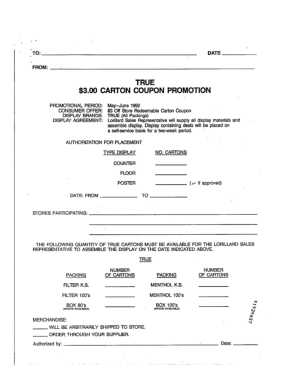

In [ ]:
img_path = "dataset/test/images/91939637.png"
img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")


In [ ]:
text = pytesseract.image_to_string(img)
print(text)


DATE

FROM:
TRUE

$3.00 CARTON COUPON PROMOTION

PROMOTIONAL PERIOD: May-June 1992
‘CONSUMER OFFER: $3 Off Store Redeemable Carton Coupon
DISPLAY BRANDS: TRUE (All Packings)
DISPLAY AGREEMENT: Lorillard Sales Representative will supply all display materials and
assemble display. Display containing deals will be placed on
a sell-service basis for a twoweek period.

‘AUTHORIZATION FOR PLACEMENT

TYPE DISPLAY NO. CARTONS:
COUNTER,
FLOOR
POSTER (+ if approved)

DATE: FROM

 

STORES PARTICIPATING: __~

 

 

‘THE FOLLOWING QUANTITY OF TRUE CARTONS MUST BE AVAILABLE FOR THE LORILLARD SALES
REPRESENTATIVE TO ASSEMBLE THE DISPLAY ON THE DATE INDICATED ABOVE.

‘TRUE
NUMBER NUMBER
PACKING OF CARTONS PACKING OF CARTONS

FILTERKS, = _________— MENTHOL KS.
FILTER 100's MENTHOL 100's

BOX 80's BOX 100's 2

onsen) ceo nna é

o

MERCHANDISE: é

WILL BE ARBITRARILY SHIPPED TO STORE.
ORDER, THROUGH YOUR SUPPLIER.

 

 

Authorized by:

 



(np.float64(-0.5), np.float64(753.5), np.float64(999.5), np.float64(-0.5))

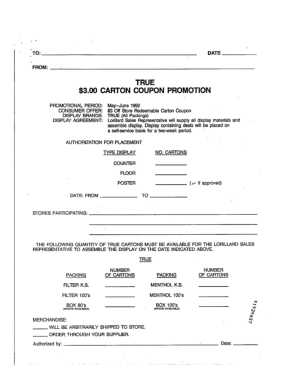

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.axis("off")


(np.float64(-0.5), np.float64(753.5), np.float64(999.5), np.float64(-0.5))

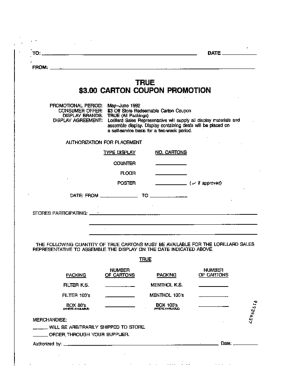

In [ ]:
_, thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.imshow(thresh, cmap="gray")
plt.axis("off")


In [ ]:
text_thresh = pytesseract.image_to_string(thresh)
print(text_thresh)


DATE

FROM:
TRUE

$3.00 CARTON COUPON PROMOTION

PROMOTIONAL PERIOD: May-June 1992
‘CONSUMER OFFER: $3 Off Store Redeemable Carton Coupon
DISPLAY BRANDS: TRUE (All Packings)
DISPLAY AGREEMENT: Lorillard Salos Representative will supply all display materials and
assemble display. Display containing deals will be placed on
a selkarvice basis for a twowaok period.

AUTHORIZATION FOR PLACEMENT

‘TYPE DISPLAY NO. CARTONS:
‘COUNTER:
FLOOR
POSTER (if approved)

DATE: FROM

 

STORES PARTICIPATING: _~

 

 

‘THE FOLLOWING QUANTITY OF TRUE CARTONS MUST BE AVAILABLE FOR THE LORILLARD SALES
REPRESENTATIVE TO ASSEMBLE THE DISPLAY ON THE DATE INDICATED ABOVE,

‘TRUE
NUMBER NUMBER
PACKING OF CARTONS PACKING OF CARTONS

FILTERKS. = MENTHOL KS.
FILTER 100s MENTHOL 100's

BOX 80's BOX 100's 2

ce sveeaney ORS, é

=

MERCHANDISE: é

_——— WILL BE ARBITRARILY SHIPPED TO STORE.
ORDER, THROUGH YOUR SUPPLIER.

 

 

Authorized by:

 



In [ ]:
custom_config = r'--psm 6'
text_psm6 = pytesseract.image_to_string(thresh, config=custom_config)
print(text_psm6)


“To: DATE
FROM: Cee nen
TRUE
$3.00 CARTON COUPON PROMOTION
PROMOTIONAL PERIOD: May-June 1992
CONSUMER OFFER: $3 Off Store Radesmable Carton Coupon
DISPLAY BRANDS: TRUE (All Packings)
DISPLAY AGREEMENT: Loillard Safes Representative will supply all display materials and
assemble display. Display containing deals wil be placed on
a selhaervics basis for a two-wook period
AUTHORIZATION FOR PLACEMENT
‘TYPE DISPLAY NO. CARTONS
COUNTER —_—
FLOOR —_—
POSTER —_____ & ft approved)
DATE: FROM To
STORES PARTICIPATING: =
THE FOLLOWING QUANTITY OF TRUE CARTONS MUST BE AVAILABLE FOR THE LORILLARD SALES
REPRESENTATIVE TO ASSEMBLE THE DISPLAY ON THE-DATE INDICATED ABOVE.
‘TRUE
NUMBER NUMBER
PACKING OF CARTONS PACKING OF GARTONS
FILTER KS. —— MENTHOL KS. —_
FULTER 103 MENTHOL 1008
BOX £0's —_ BOX 100s —_ 2
ce sveeaney mea é
=
‘MERCHANDISE: 3
WILL 8E ARBITRARILY SHIPPED TO STORE.
ORDER, THROUGH YOUR SUPPLIER.
Authorized by: ata



In [ ]:
custom_config = r'--psm 3'
text_psm3 = pytesseract.image_to_string(thresh, config=custom_config)
print(text_psm3)


DATE

FROM:
TRUE

$3.00 CARTON COUPON PROMOTION

PROMOTIONAL PERIOD: May-June 1992
‘CONSUMER OFFER: $3 Off Store Redeemable Carton Coupon
DISPLAY BRANDS: TRUE (All Packings)
DISPLAY AGREEMENT: Lorillard Salos Representative will supply all display materials and
assemble display. Display containing deals will be placed on
a selkarvice basis for a twowaok period.

AUTHORIZATION FOR PLACEMENT

‘TYPE DISPLAY NO. CARTONS:
‘COUNTER:
FLOOR
POSTER (if approved)

DATE: FROM

 

STORES PARTICIPATING: _~

 

 

‘THE FOLLOWING QUANTITY OF TRUE CARTONS MUST BE AVAILABLE FOR THE LORILLARD SALES
REPRESENTATIVE TO ASSEMBLE THE DISPLAY ON THE DATE INDICATED ABOVE,

‘TRUE
NUMBER NUMBER
PACKING OF CARTONS PACKING OF CARTONS

FILTERKS. = MENTHOL KS.
FILTER 100s MENTHOL 100's

BOX 80's BOX 100's 2

ce sveeaney ORS, é

=

MERCHANDISE: é

_——— WILL BE ARBITRARILY SHIPPED TO STORE.
ORDER, THROUGH YOUR SUPPLIER.

 

 

Authorized by:

 



In [ ]:
!ls form/test
!ls real_life/test


annotations  images
annotations  images


In [ ]:
!ls form/test/annotations


0001463282.json  0060214859.json     82837252.json
0001463448.json  01073843.json	     85240939.json
0001476912.json  01191071_1072.json  87528321.json
00040534.json	 716552.json	     91161344_91161347.json
0011838621.json  81619511_9513.json  91356315.json
0012602424.json  82250337_0338.json  91814768_91814769.json
0060077689.json  82253362_3364.json  91903177.json


In [ ]:
!ls real_life//test/annotations


poly_gt_img1002.txt  poly_gt_img148.txt   poly_gt_img5.txt
poly_gt_img1003.txt  poly_gt_img1502.txt  poly_gt_img601.txt
poly_gt_img1013.txt  poly_gt_img1512.txt  poly_gt_img611.txt
poly_gt_img1022.txt  poly_gt_img1515.txt  poly_gt_img615.txt
poly_gt_img102.txt   poly_gt_img1518.txt  poly_gt_img636.txt
poly_gt_img1032.txt  poly_gt_img1534.txt  poly_gt_img640.txt
poly_gt_img1044.txt  poly_gt_img1541.txt  poly_gt_img644.txt
poly_gt_img1052.txt  poly_gt_img1.txt	  poly_gt_img662.txt
poly_gt_img1059.txt  poly_gt_img224.txt   poly_gt_img680.txt
poly_gt_img1078.txt  poly_gt_img225.txt   poly_gt_img701.txt
poly_gt_img1081.txt  poly_gt_img231.txt   poly_gt_img711.txt
poly_gt_img1089.txt  poly_gt_img235.txt   poly_gt_img720.txt
poly_gt_img1090.txt  poly_gt_img242.txt   poly_gt_img733.txt
poly_gt_img109.txt   poly_gt_img254.txt   poly_gt_img734.txt
poly_gt_img1105.txt  poly_gt_img280.txt   poly_gt_img756.txt
poly_gt_img1107.txt  poly_gt_img287.txt   poly_gt_img767.txt
poly_gt_img1117.txt  poly_gt

In [ ]:
!ls real_life/test/images



img100.jpg   img1306.jpg  img170.jpg  img33.jpg   img518.jpg  img780.jpg
img1040.jpg  img1310.jpg  img172.jpg  img343.jpg  img521.jpg  img816.jpg
img1055.jpg  img1322.jpg  img177.jpg  img34.jpg   img551.jpg  img81.jpg
img1061.jpg  img132.jpg   img181.jpg  img358.jpg  img552.jpg  img823.jpg
img1069.jpg  img1332.jpg  img182.jpg  img360.jpg  img561.jpg  img825.jpg
img1099.jpg  img1335.jpg  img200.jpg  img373.jpg  img581.jpg  img826.jpg
img10.jpg    img1341.jpg  img204.jpg  img379.jpg  img586.jpg  img829.jpg
img1108.jpg  img1353.jpg  img218.jpg  img37.jpg   img594.jpg  img837.jpg
img1116.jpg  img138.jpg   img238.jpg  img392.jpg  img597.jpg  img839.jpg
img1122.jpg  img1392.jpg  img255.jpg  img399.jpg  img598.jpg  img843.jpg
img1138.jpg  img1393.jpg  img260.jpg  img39.jpg   img59.jpg   img85.jpg
img1144.jpg  img1425.jpg  img268.jpg  img406.jpg  img606.jpg  img87.jpg
img1146.jpg  img1434.jpg  img270.jpg  img419.jpg  img611.jpg  img889.jpg
img1170.jpg  img1452.jpg  img275.jpg  img41.jpg   img6

In [ ]:
!ls real_life/test/annotations


poly_gt_img1002.txt  poly_gt_img148.txt   poly_gt_img5.txt
poly_gt_img1003.txt  poly_gt_img1502.txt  poly_gt_img601.txt
poly_gt_img1013.txt  poly_gt_img1512.txt  poly_gt_img611.txt
poly_gt_img1022.txt  poly_gt_img1515.txt  poly_gt_img615.txt
poly_gt_img102.txt   poly_gt_img1518.txt  poly_gt_img636.txt
poly_gt_img1032.txt  poly_gt_img1534.txt  poly_gt_img640.txt
poly_gt_img1044.txt  poly_gt_img1541.txt  poly_gt_img644.txt
poly_gt_img1052.txt  poly_gt_img1.txt	  poly_gt_img662.txt
poly_gt_img1059.txt  poly_gt_img224.txt   poly_gt_img680.txt
poly_gt_img1078.txt  poly_gt_img225.txt   poly_gt_img701.txt
poly_gt_img1081.txt  poly_gt_img231.txt   poly_gt_img711.txt
poly_gt_img1089.txt  poly_gt_img235.txt   poly_gt_img720.txt
poly_gt_img1090.txt  poly_gt_img242.txt   poly_gt_img733.txt
poly_gt_img109.txt   poly_gt_img254.txt   poly_gt_img734.txt
poly_gt_img1105.txt  poly_gt_img280.txt   poly_gt_img756.txt
poly_gt_img1107.txt  poly_gt_img287.txt   poly_gt_img767.txt
poly_gt_img1117.txt  poly_gt

In [ ]:
!ls real_life/test/annotations | head


poly_gt_img1002.txt
poly_gt_img1003.txt
poly_gt_img1013.txt
poly_gt_img1022.txt
poly_gt_img102.txt
poly_gt_img1032.txt
poly_gt_img1044.txt
poly_gt_img1052.txt
poly_gt_img1059.txt
poly_gt_img1078.txt


In [ ]:
!sed -n '1,20p' real_life/test/annotations/poly_gt_img102.txt


x: [[ 277  553  883 1151 1107  867  573  363]], y: [[261  47  41 273 355 159 163 339]], ornt: [u'c'], transcriptions: [u'COSENTINOS']
x: [[  59 1317 1295   29]], y: [[473 307 737 899]], ornt: [u'm'], transcriptions: [u'Market']
x: [[ 421  785 1105 1181  803  335]], y: [[ 957 1089  977 1095 1259 1053]], ornt: [u'c'], transcriptions: [u'DOWNTOWN']


In [ ]:
import re

gt_file = "real_life/test/annotations/poly_gt_img102.txt"

ground_truth_words = []

with open(gt_file, "r") as f:
    for line in f:
        matches = re.findall(r"transcriptions:\s*\[\s*'([^']+)'\s*\]", line)
        ground_truth_words.extend(matches)

ground_truth = " ".join(ground_truth_words)
print(ground_truth)



In [ ]:
ocr_output = text_psm3



In [ ]:
print(ocr_output)


DATE

FROM:
TRUE

$3.00 CARTON COUPON PROMOTION

PROMOTIONAL PERIOD: May-June 1992
‘CONSUMER OFFER: $3 Off Store Redeemable Carton Coupon
DISPLAY BRANDS: TRUE (All Packings)
DISPLAY AGREEMENT: Lorillard Salos Representative will supply all display materials and
assemble display. Display containing deals will be placed on
a selkarvice basis for a twowaok period.

AUTHORIZATION FOR PLACEMENT

‘TYPE DISPLAY NO. CARTONS:
‘COUNTER:
FLOOR
POSTER (if approved)

DATE: FROM

 

STORES PARTICIPATING: _~

 

 

‘THE FOLLOWING QUANTITY OF TRUE CARTONS MUST BE AVAILABLE FOR THE LORILLARD SALES
REPRESENTATIVE TO ASSEMBLE THE DISPLAY ON THE DATE INDICATED ABOVE,

‘TRUE
NUMBER NUMBER
PACKING OF CARTONS PACKING OF CARTONS

FILTERKS. = MENTHOL KS.
FILTER 100s MENTHOL 100's

BOX 80's BOX 100's 2

ce sveeaney ORS, é

=

MERCHANDISE: é

_——— WILL BE ARBITRARILY SHIPPED TO STORE.
ORDER, THROUGH YOUR SUPPLIER.

 

 

Authorized by:

 



In [ ]:
from jiwer import wer, cer

print("Ground Truth:")
print(ground_truth)

print("\nOCR Output:")
print(ocr_output)

print("\nWord Error Rate (WER):", wer(ground_truth, ocr_output))
print("Character Error Rate (CER):", cer(ground_truth, ocr_output))


Ground Truth:


OCR Output:
DATE

FROM:
TRUE

$3.00 CARTON COUPON PROMOTION

PROMOTIONAL PERIOD: May-June 1992
‘CONSUMER OFFER: $3 Off Store Redeemable Carton Coupon
DISPLAY BRANDS: TRUE (All Packings)
DISPLAY AGREEMENT: Lorillard Salos Representative will supply all display materials and
assemble display. Display containing deals will be placed on
a selkarvice basis for a twowaok period.

AUTHORIZATION FOR PLACEMENT

‘TYPE DISPLAY NO. CARTONS:
‘COUNTER:
FLOOR
POSTER (if approved)

DATE: FROM

 

STORES PARTICIPATING: _~

 

 

‘THE FOLLOWING QUANTITY OF TRUE CARTONS MUST BE AVAILABLE FOR THE LORILLARD SALES
REPRESENTATIVE TO ASSEMBLE THE DISPLAY ON THE DATE INDICATED ABOVE,

‘TRUE
NUMBER NUMBER
PACKING OF CARTONS PACKING OF CARTONS

FILTERKS. = MENTHOL KS.
FILTER 100s MENTHOL 100's

BOX 80's BOX 100's 2

ce sveeaney ORS, é

=

MERCHANDISE: é

_——— WILL BE ARBITRARILY SHIPPED TO STORE.
ORDER, THROUGH YOUR SUPPLIER.

 

 

Authorized by:

 


Word Error Rate (WER): 119
Character Error 

In [ ]:
print("Raw text_psm3 repr:")
print(repr(text_psm3))


Raw text_psm3 repr:
"DATE\n\nFROM:\nTRUE\n\n$3.00 CARTON COUPON PROMOTION\n\nPROMOTIONAL PERIOD: May-June 1992\n‘CONSUMER OFFER: $3 Off Store Redeemable Carton Coupon\nDISPLAY BRANDS: TRUE (All Packings)\nDISPLAY AGREEMENT: Lorillard Salos Representative will supply all display materials and\nassemble display. Display containing deals will be placed on\na selkarvice basis for a twowaok period.\n\nAUTHORIZATION FOR PLACEMENT\n\n‘TYPE DISPLAY NO. CARTONS:\n‘COUNTER:\nFLOOR\nPOSTER (if approved)\n\nDATE: FROM\n\n \n\nSTORES PARTICIPATING: _~\n\n \n\n \n\n‘THE FOLLOWING QUANTITY OF TRUE CARTONS MUST BE AVAILABLE FOR THE LORILLARD SALES\nREPRESENTATIVE TO ASSEMBLE THE DISPLAY ON THE DATE INDICATED ABOVE,\n\n‘TRUE\nNUMBER NUMBER\nPACKING OF CARTONS PACKING OF CARTONS\n\nFILTERKS. = MENTHOL KS.\nFILTER 100s MENTHOL 100's\n\nBOX 80's BOX 100's 2\n\nce sveeaney ORS, é\n\n=\n\nMERCHANDISE: é\n\n_——— WILL BE ARBITRARILY SHIPPED TO STORE.\nORDER, THROUGH YOUR SUPPLIER.\n\n \n\n \n\nAuthorized by:\

In [ ]:
ocr_output_clean = " ".join(ocr_output.split())
ground_truth_clean = " ".join(ground_truth.split())


In [ ]:
from jiwer import wer, cer

print("Ground Truth:")
print(ground_truth_clean)

print("\nOCR Output:")
print(ocr_output_clean)

print("\nWord Error Rate (WER):", wer(ground_truth_clean, ocr_output_clean))
print("Character Error Rate (CER):", cer(ground_truth_clean, ocr_output_clean))


Ground Truth:


OCR Output:
DATE FROM: TRUE $3.00 CARTON COUPON PROMOTION PROMOTIONAL PERIOD: May-June 1992 ‘CONSUMER OFFER: $3 Off Store Redeemable Carton Coupon DISPLAY BRANDS: TRUE (All Packings) DISPLAY AGREEMENT: Lorillard Salos Representative will supply all display materials and assemble display. Display containing deals will be placed on a selkarvice basis for a twowaok period. AUTHORIZATION FOR PLACEMENT ‘TYPE DISPLAY NO. CARTONS: ‘COUNTER: FLOOR POSTER (if approved) DATE: FROM STORES PARTICIPATING: _~ ‘THE FOLLOWING QUANTITY OF TRUE CARTONS MUST BE AVAILABLE FOR THE LORILLARD SALES REPRESENTATIVE TO ASSEMBLE THE DISPLAY ON THE DATE INDICATED ABOVE, ‘TRUE NUMBER NUMBER PACKING OF CARTONS PACKING OF CARTONS FILTERKS. = MENTHOL KS. FILTER 100s MENTHOL 100's BOX 80's BOX 100's 2 ce sveeaney ORS, é = MERCHANDISE: é _——— WILL BE ARBITRARILY SHIPPED TO STORE. ORDER, THROUGH YOUR SUPPLIER. Authorized by:

Word Error Rate (WER): 133
Character Error Rate (CER): 891


In [ ]:
print("Extracted ground truth words list:")
print(ground_truth_words)


Extracted ground truth words list:
[]


In [ ]:
ground_truth_clean = "COSENTINOS Market DOWNTOWN"
print(ground_truth_clean)


COSENTINOS Market DOWNTOWN


In [ ]:
from jiwer import wer, cer

print("Ground Truth:")
print(ground_truth_clean)

print("\nOCR Output:")
print(ocr_output_clean)

print("\nWord Error Rate (WER):", wer(ground_truth_clean, ocr_output_clean))
print("Character Error Rate (CER):", cer(ground_truth_clean, ocr_output_clean))


Ground Truth:
COSENTINOS Market DOWNTOWN

OCR Output:
DATE FROM: TRUE $3.00 CARTON COUPON PROMOTION PROMOTIONAL PERIOD: May-June 1992 ‘CONSUMER OFFER: $3 Off Store Redeemable Carton Coupon DISPLAY BRANDS: TRUE (All Packings) DISPLAY AGREEMENT: Lorillard Salos Representative will supply all display materials and assemble display. Display containing deals will be placed on a selkarvice basis for a twowaok period. AUTHORIZATION FOR PLACEMENT ‘TYPE DISPLAY NO. CARTONS: ‘COUNTER: FLOOR POSTER (if approved) DATE: FROM STORES PARTICIPATING: _~ ‘THE FOLLOWING QUANTITY OF TRUE CARTONS MUST BE AVAILABLE FOR THE LORILLARD SALES REPRESENTATIVE TO ASSEMBLE THE DISPLAY ON THE DATE INDICATED ABOVE, ‘TRUE NUMBER NUMBER PACKING OF CARTONS PACKING OF CARTONS FILTERKS. = MENTHOL KS. FILTER 100s MENTHOL 100's BOX 80's BOX 100's 2 ce sveeaney ORS, é = MERCHANDISE: é _——— WILL BE ARBITRARILY SHIPPED TO STORE. ORDER, THROUGH YOUR SUPPLIER. Authorized by:

Word Error Rate (WER): 44.333333333333336
Character E